In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/19_35000.xlsx")
df = df.drop(['Unnamed: 0', 'Title'], axis = 1)
df = df.drop_duplicates()
df

,IC50,SMILES
0,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...
...,...,...
36372,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...
36373,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O
36374,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...
36375,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O


array([[<Axes: title={'center': 'IC50'}>]], dtype=object)

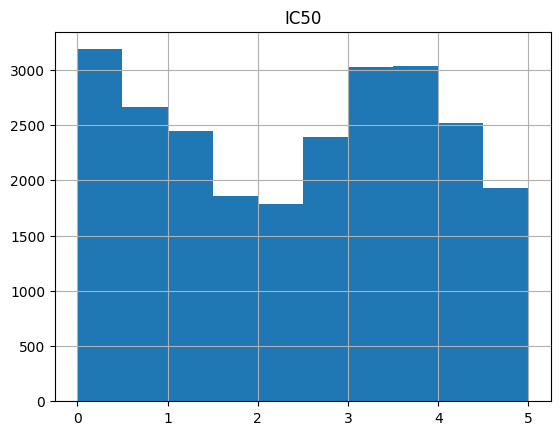

In [ ]:
df[df['IC50'] < 5].hist()

array([[<Axes: title={'center': 'IC50'}>]], dtype=object)

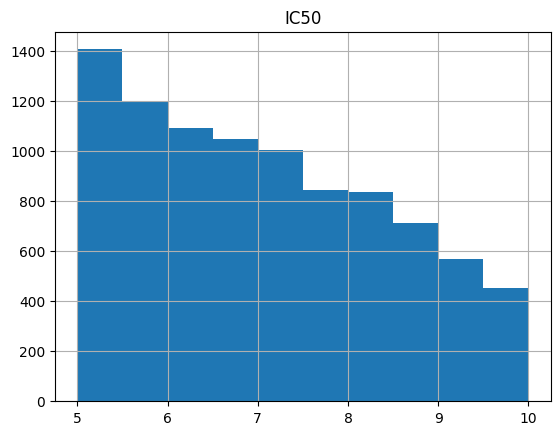

In [ ]:
df[(df['IC50'] > 5) & (df['IC50'] < 10)].hist()

array([[<Axes: title={'center': 'IC50'}>]], dtype=object)

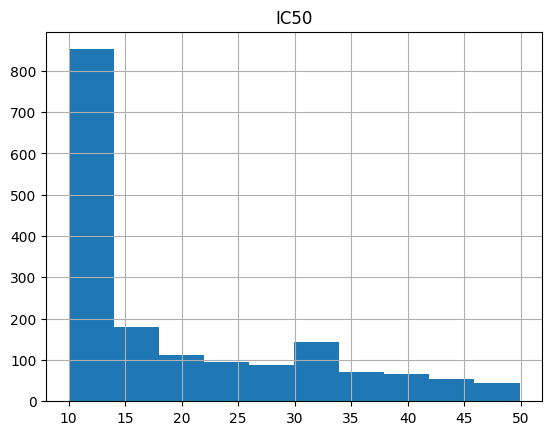

In [ ]:
df[(df['IC50'] > 10) & (df['IC50'] < 50)].hist()

array([[<Axes: title={'center': 'IC50'}>]], dtype=object)

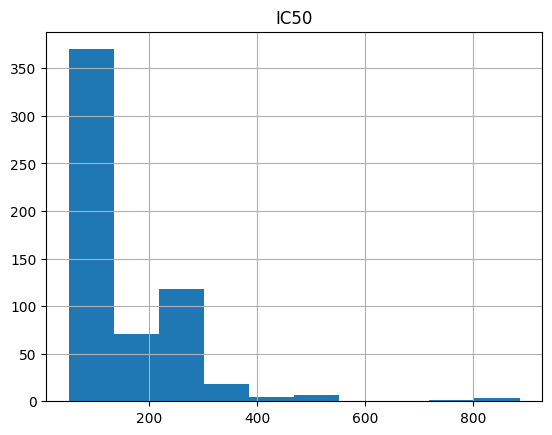

In [ ]:
df[(df['IC50'] > 50) & (df['IC50'] < 1000)].hist()

array([[<Axes: title={'center': 'IC50'}>]], dtype=object)

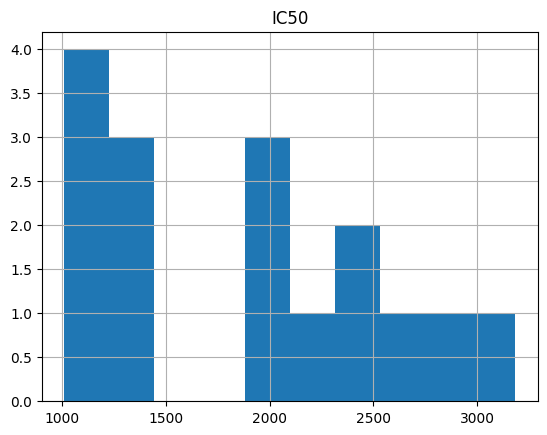

In [ ]:
df[(df['IC50'] > 1000)].hist()

# Кодирование

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 33.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def mol_dsc_calc(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

# список конституционных и физико-химических дескрипторов из библиотеки RDKit
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA}

# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X = descriptors_transformer.transform(df['SMILES'])
X.head()

[10:13:19] Conflicting single bond directions around double bond at index 55.
[10:13:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:13:19] Conflicting single bond directions around double bond at index 55.
[10:13:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:13:19] Conflicting single bond directions around double bond at index 55.
[10:13:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:13:19] Conflicting single bond directions around double bond at index 55.
[10:13:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:13:19] Conflicting single bond directions around double bond at index 55.
[10:13:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:13:19] Conflicting single bond directions around double bond at index 55.
[10:13:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:13:19] Conflicting single bond direc

,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
0,24,7,9,4,6,10,7,138,0,0,1,362.367,0.38187,90.4296,157.76
1,21,4,6,4,3,6,7,120,0,0,1,298.383,1.05450,79.7279,101.65
2,21,3,6,5,2,6,7,118,0,0,1,295.359,-0.36170,77.0531,104.48
3,20,3,6,5,2,6,6,114,0,0,1,283.348,-0.52780,72.5301,104.48
4,24,4,9,6,4,9,3,122,3,0,3,329.268,1.09742,81.9775,149.28


In [ ]:
df["SMILES"][0]

'[H]\\N=C(N)\\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=C1P(=O)(O)O)OC(CC)CC'

In [ ]:
len(df["SMILES"][0])

66

In [ ]:
smiles_list = df["SMILES"].tolist()

In [ ]:
with open("SMILES.txt", "w") as output:
    for smile in smiles_list:
      output.write(str(smile)+"\n")

# LLAMA

In [ ]:
!pip install llama-cpp-python

In [ ]:
import llama_cpp

llm = llama_cpp.Llama(model_path="/content/drive/MyDrive/llama-2-7b-chat.Q4_K_M.gguf", embedding=True)

embeddings = llm.create_embedding("Hello, world!")

# or create multiple embeddings at once

# embeddings = llm.create_embedding(["Hello, world!", "Goodbye, world!"])
embeddings

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /content/drive/MyDrive/llama-2-7b-chat.Q4_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_co

{'object': 'list',
 'data': [{'object': 'embedding',
   'embedding': [[0.40112951397895813,
     -0.19161924719810486,
     0.21936649084091187,
     0.07847152650356293,
     -0.18631906807422638,
     -0.023393085226416588,
     0.2866121828556061,
     -0.14943264424800873,
     0.17561495304107666,
     -0.013709568418562412,
     0.09327013045549393,
     0.0526295006275177,
     -0.06811462342739105,
     0.19321909546852112,
     -0.10617723315954208,
     -0.04409342631697655,
     -0.28847837448120117,
     0.16485972702503204,
     0.08304742723703384,
     -0.20403115451335907,
     0.051685452461242676,
     0.10486976057291031,
     0.03286473825573921,
     -0.006492765620350838,
     0.06481964141130447,
     -0.09121665358543396,
     -0.3616957366466522,
     0.2760770618915558,
     -0.2401314675807953,
     0.07089672982692719,
     -0.2792198956012726,
     0.1390170156955719,
     -0.050266083329916,
     -0.16334371268749237,
     -0.35798341035842896,
     -0.214

In [ ]:
embeddings = llm.create_embedding([ df["SMILES"][0],  df["SMILES"][1], df["SMILES"][2]])


llama_print_timings:        load time =    2099.48 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =   67726.26 ms /   139 tokens (  487.24 ms per token,     2.05 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =   67877.80 ms /   140 tokens


In [ ]:
emb = embeddings["data"][0]["embedding"]
emb_np = np.array(emb)
emb_np.shape

(52, 4096)

In [ ]:
emb = embeddings["data"][1]["embedding"]
emb_np = np.array(emb)
emb_np.shape

(42, 4096)

In [ ]:
emb = embeddings["data"][2]["embedding"]
emb_np = np.array(emb)
emb_np.shape

(45, 4096)

# MolTransformerEmbeddings

In [ ]:
# !git clone https://github.com/mpcrlab/MolecularTransformerEmbeddings.git

Cloning into 'MolecularTransformerEmbeddings'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 156 (delta 33), reused 18 (delta 18), pack-reused 118
Receiving objects: 100% (156/156), 3.20 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [ ]:
import numpy as np

embeddings_map = np.load("/content/drive/MyDrive/SMILES.npz")
print(embeddings_map[df['SMILES'][0]])
print(embeddings_map[df['SMILES'][0]].shape)

[[ 0.05174598 -0.45379126  0.06704205 ... -0.05583478  0.00810534
   0.01282661]
 [ 0.54033744 -1.0692136   1.3118705  ... -0.63415056 -1.1650494
  -0.329255  ]
 [ 0.02994311 -0.44441557  0.7360274  ... -0.47626483  2.815026
  -0.4046948 ]
 ...
 [-0.6135062   0.52525204 -1.2457546  ... -0.05412124 -0.20625137
  -0.67409974]
 [-1.5580451   0.44129658  0.0077093  ...  0.9199867   0.37941313
   0.52801937]
 [-2.271258    0.35916817  0.1014995  ...  0.32185048  0.42605442
   0.18908706]]
(67, 512)


In [ ]:
import pandas as pd

# Предположим, что у вас уже есть DataFrame df и embeddings_map

# Функция для получения длины вложений
def get_embedding_length(smiles):
    # Предположим, что embeddings_map - это словарь, где ключи - это SMILES, а значения - вложения
    embedding = embeddings_map.get(smiles)
    if embedding is not None:
        return len(embedding)
    else:
        return None  # или любое значение по умолчанию для случая, если вложение отсутствует

# Добавление нового столбца с длиной вложений
df['Embedding_Length'] = df['SMILES'].apply(get_embedding_length)


In [ ]:
df['Embedding_Length'].max()

256

<Axes: >

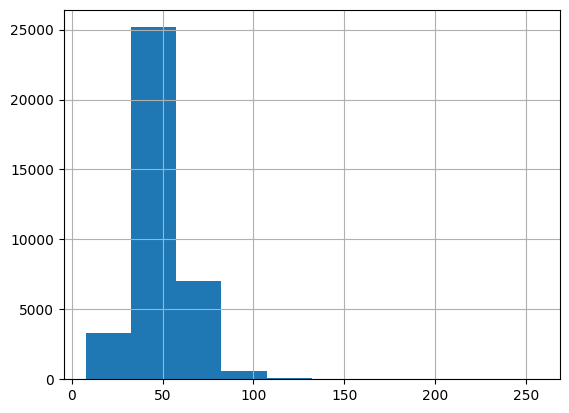

In [ ]:
df["Embedding_Length"].hist()

In [ ]:
collapsed = embeddings_map[df['SMILES'][1]].mean(axis=1)
collapsed.shape

(53,)

In [ ]:
import numpy as np
import pandas as pd

max_length = df["Embedding_Length"].max()

for i in range(max_length):
    df[f'emb_{i+1}'] = np.nan

for index, row in df.iterrows():
    embeddings = embeddings_map.get(row["SMILES"]).mean(axis=1)
    for i, emb in enumerate(embeddings[:max_length]):
        df.at[index, f'emb_{i+1}'] = emb if emb is not None else np.zeros_like(embeddings[0])

df.fillna(0, inplace=True)


In [ ]:
df.to_csv("smile_with_emb.csv")

In [ ]:
df

,IC50,SMILES,Embedding_Length,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,...,emb_247,emb_248,emb_249,emb_250,emb_251,emb_252,emb_253,emb_254,emb_255,emb_256
0,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,67,0.005079,-0.009117,0.003831,-0.015570,0.007516,-0.014574,-0.013400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,53,0.005031,-0.011483,-0.013605,-0.016147,-0.001215,-0.001631,-0.013177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,56,0.005080,-0.012844,-0.011766,-0.014076,-0.017436,-0.005749,-0.004327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,54,0.005218,-0.009704,-0.009804,-0.007640,-0.008977,-0.011321,-0.021320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,56,0.004640,-0.013865,0.001332,-0.013845,0.004294,0.001234,-0.005964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36372,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...,105,0.004835,-0.007883,-0.008048,-0.015607,-0.016446,-0.019496,-0.024594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36373,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O,33,0.004909,-0.013620,-0.013675,-0.004464,-0.010934,-0.012993,-0.019950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36374,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...,136,0.004709,-0.010079,0.007337,-0.009972,-0.009955,-0.009959,-0.009929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36375,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O,36,0.004768,-0.007719,-0.009585,-0.009383,-0.005909,-0.003574,0.009786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
n_classes = 20

df['IC50_bins'] = pd.qcut(df['IC50'], q=n_classes, labels=False)

In [ ]:
df['IC50_log'] = np.log1p(df['IC50'])

<ipython-input-284-145d494553d9>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['IC50_log'] = np.log1p(df['IC50'])


In [ ]:
df

,IC50,SMILES,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_248,emb_249,emb_250,emb_251,emb_252,emb_253,emb_254,emb_255,emb_256,IC50_log
0,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,0.005079,-0.009117,0.003831,-0.015570,0.007516,-0.014574,-0.013400,-0.004205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000014
1,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,0.005031,-0.011483,-0.013605,-0.016147,-0.001215,-0.001631,-0.013177,-0.000144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016
2,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,0.005080,-0.012844,-0.011766,-0.014076,-0.017436,-0.005749,-0.004327,-0.006550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000033
3,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,0.005218,-0.009704,-0.009804,-0.007640,-0.008977,-0.011321,-0.021320,-0.007029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000032
4,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,0.004640,-0.013865,0.001332,-0.013845,0.004294,0.001234,-0.005964,-0.011001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36372,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...,0.004835,-0.007883,-0.008048,-0.015607,-0.016446,-0.019496,-0.024594,-0.011796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.769712
36373,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O,0.004909,-0.013620,-0.013675,-0.004464,-0.010934,-0.012993,-0.019950,-0.007481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.771952
36374,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...,0.004709,-0.010079,0.007337,-0.009972,-0.009955,-0.009959,-0.009929,-0.013070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.864024
36375,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O,0.004768,-0.007719,-0.009585,-0.009383,-0.005909,-0.003574,0.009786,0.007887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.935230


In [ ]:
df['IC50_bins'].value_counts()

IC50_bins
14    1824
1     1822
0     1820
4     1820
9     1820
2     1819
8     1819
11    1818
17    1818
16    1818
12    1818
19    1818
7     1818
6     1818
13    1817
18    1817
5     1816
10    1812
15    1811
3     1810
Name: count, dtype: int64

In [ ]:
df = df.drop('IC50_bins', axis=1)

In [ ]:
df = df.drop('Embedding_Length', axis=1)

# Model

In [ ]:
batch_size = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# X = df.groupby('SMILES').median().reset_index()
# X = X.drop('IC50', axis=1)

In [ ]:
y = df['IC50_log']
X = df.drop(['IC50_log', 'SMILES'], axis=1)

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    shuffle=True
)
train_dataset = TensorDataset(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
val_dataset = TensorDataset(torch.FloatTensor(X_test.values), torch.FloatTensor(y_test.values))

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
X.shape

(36260, 256)

In [ ]:
import torch
import torch.nn as nn

class RegNet(nn.Module):
    def __init__(self, input_neurons=256, n_hidden_neurons=256*2):
        super(RegNet, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_neurons, n_hidden_neurons),
            # nn.BatchNorm1d(n_hidden_neurons),
            nn.ReLU(inplace=True),
            nn.Linear(n_hidden_neurons, n_hidden_neurons),
            nn.BatchNorm1d(n_hidden_neurons),
            nn.ReLU(inplace=True),
            # nn.Linear(n_hidden_neurons, n_hidden_neurons),
            # nn.BatchNorm1d(n_hidden_neurons),
            # nn.ReLU(inplace=True),
            nn.Linear(n_hidden_neurons, n_hidden_neurons),
            nn.BatchNorm1d(n_hidden_neurons),
            nn.ReLU(inplace=True),
            nn.Linear(n_hidden_neurons, 1)
        )

    def forward(self, x):
        x = self.fc_layers(x)
        return x


In [ ]:
from sklearn.metrics import r2_score, f1_score

def train_model(net, train_dataloader, val_dataloader, loss, optimizer, scheduler, num_epochs,
                val_accuracy_history, train_accuracy_history, val_loss_history, train_loss_history):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                net.train()
            else:
                dataloader = val_dataloader
                net.eval()

            running_loss = 0.
            running_acc = 0.

            for i, (X, y) in enumerate(dataloader):
                X = X.to(device)
                y = y.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    preds = net.forward(X).squeeze(-1)
                    loss_value = loss(preds, y)
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                running_loss += loss_value.item()


                # Calculate R^2
                if phase == 'train':
                    train_r2 = r2_score(y.cpu().detach().numpy(), preds.cpu().detach().numpy())
                    train_accuracy_history.append(train_r2)
                else:
                    val_r2 = r2_score(y.cpu().detach().numpy(), preds.cpu().detach().numpy())
                    val_accuracy_history.append(val_r2)

            if phase == 'train':
              train_loss_history.append(running_loss / len(dataloader))
            else:
              val_loss_history.append(running_loss / len(dataloader))

            epoch_loss = running_loss / len(dataloader)

            print('{} Loss: {:.4f} R^2: {:.4f}'.format(phase, epoch_loss, val_r2 if phase == 'val' else train_r2), flush=True)

    return net


In [ ]:
reg_net = RegNet()
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(reg_net.parameters(), lr=1.0e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
epoch_number = 200

In [ ]:
val_accuracy_history = []
val_loss_history = []
train_accuracy_history = []
train_loss_history = []

train_model(
    net=reg_net,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    loss=loss,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=epoch_number,
    val_accuracy_history=val_accuracy_history,
    val_loss_history=val_loss_history,
    train_accuracy_history=train_accuracy_history,
    train_loss_history=train_loss_history
);

Epoch 0/199:
train Loss: 0.7334 R^2: 0.1393
val Loss: 0.6678 R^2: -0.0668
Epoch 1/199:
train Loss: 0.6111 R^2: -0.1634
val Loss: 0.6433 R^2: -0.0609
Epoch 2/199:
train Loss: 0.5816 R^2: 0.1305
val Loss: 0.5977 R^2: -0.0044
Epoch 3/199:
train Loss: 0.5590 R^2: -0.1550
val Loss: 0.6496 R^2: 0.1163
Epoch 4/199:
train Loss: 0.4808 R^2: 0.4933
val Loss: 0.5615 R^2: 0.1691
Epoch 5/199:
train Loss: 0.4474 R^2: 0.1687
val Loss: 0.5648 R^2: 0.1649
Epoch 6/199:
train Loss: 0.4282 R^2: 0.3894
val Loss: 0.5704 R^2: 0.1811
Epoch 7/199:
train Loss: 0.4100 R^2: 0.3328
val Loss: 0.5751 R^2: 0.1323
Epoch 8/199:
train Loss: 0.3946 R^2: 0.3891
val Loss: 0.5868 R^2: 0.1396
Epoch 9/199:
train Loss: 0.3616 R^2: 0.3337
val Loss: 0.5723 R^2: 0.1955
Epoch 10/199:
train Loss: 0.3567 R^2: 0.5778
val Loss: 0.5742 R^2: 0.1949
Epoch 11/199:
train Loss: 0.3552 R^2: 0.3890
val Loss: 0.5753 R^2: 0.1851
Epoch 12/199:
train Loss: 0.3524 R^2: 0.2227
val Loss: 0.5769 R^2: 0.1892
Epoch 13/199:
train Loss: 0.3499 R^2: 0.432

KeyboardInterrupt: 

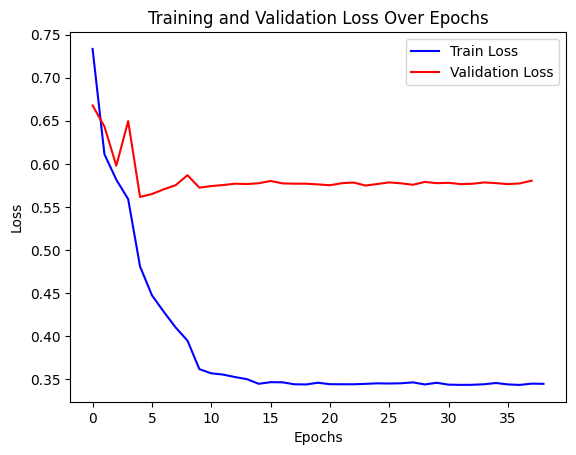

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss_history, label='Train Loss', color='blue')

plt.plot(val_loss_history, label='Validation Loss', color='red')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

plt.show()

# Классификация

In [ ]:
batch_size = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
quantiles = []
for i in range(0, 101, 5):
    quantiles += [df['IC50'].quantile(i / 100)]

def get_class(x):
    for i in range(len(quantiles)):
        if x < quantiles[i]:
            return i

df['class'] = df['IC50'].apply(lambda x: get_class(x))
df['class'] = df['class'].fillna(max(df['class'])).astype('int') - 1

<ipython-input-307-dbb37ef2e60d>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['class'] = df['IC50'].apply(lambda x: get_class(x))


In [ ]:
df['class'].value_counts()

class
8     1839
10    1822
13    1822
18    1821
2     1820
3     1819
11    1818
16    1818
15    1818
19    1818
5     1818
14    1817
1     1816
4     1816
0     1816
9     1814
17    1814
12    1813
6     1813
7     1801
Name: count, dtype: int64

In [ ]:
X = df.groupby('SMILES').median().reset_index()
X = X.drop('IC50', axis=1)

In [ ]:
y = X['class']
X = X.drop(['class', 'SMILES'], axis=1)

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    shuffle=True
)
# train_dataset = TensorDataset(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
# val_dataset = TensorDataset(torch.FloatTensor(X_test.values), torch.FloatTensor(y_test.values))

# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [ ]:
X.shape

(36260, 51)

In [ ]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super().__init__()
    self.fc1 = torch.nn.Linear(51, n_hidden_neurons) #первый параметр 2 (2 признака/столбца)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 20) #выход параметр 3 (3 класса)
    self.sm = torch.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x

wine_net = WineNet(256)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

In [ ]:
def wine_net_train(batch_size, wine_net_curr, X_test, y_test, X_train, y_train, epoch_number, optimizer_curr, loss):
  X_test = X_test.to(device)
  y_test = y_test.to(device)

  for epoch in range(epoch_number):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
      optimizer_curr.zero_grad()

      batch_indexes = order[start_index:start_index+batch_size]

      x_batch = X_train[batch_indexes].to(device)
      y_batch = y_train[batch_indexes].to(device)

      preds = wine_net_curr.forward(x_batch)

      loss_val = loss(preds, y_batch)
      loss_val.backward()

      optimizer_curr.step()

    if epoch % 5 == 0:
      test_preds = wine_net_curr.forward(X_test)
      test_preds = test_preds.argmax(dim=1)
      accuracy = (test_preds == y_test).float().mean()
      print(f'acc: {accuracy.item()} loss: {loss_val}')

  test_preds = wine_net_curr.forward(X_test)
  loss_number = loss(test_preds, y_test)
  test_preds = test_preds.argmax(dim=1)
  accuracy = (test_preds == y_test).float().mean()
  # df_res.loc[len(df_res.index)] = [neurons, accuracy.cpu().detach().numpy(), loss_number.cpu().detach().numpy()]
  # print('Done', neurons, '\n')

In [ ]:
 wine_net_train(256, wine_net, X_test, y_test, X_train, y_train, 500, optimizer, loss)

acc: 0.0476190485060215 loss: 3.0935182571411133
acc: 0.0476190485060215 loss: 3.0339860916137695
acc: 0.0476190485060215 loss: 3.010211706161499
acc: 0.0476190485060215 loss: 2.995513916015625
acc: 0.0476190485060215 loss: 3.0300209522247314
acc: 0.0476190485060215 loss: 2.9908783435821533
acc: 0.0476190485060215 loss: 3.0518381595611572
acc: 0.0476190485060215 loss: 3.041433811187744
acc: 0.0476190485060215 loss: 3.063283920288086
acc: 0.0476190485060215 loss: 2.991482734680176
acc: 0.0476190485060215 loss: 3.0436484813690186
acc: 0.0476190485060215 loss: 2.965381383895874
acc: 0.0476190485060215 loss: 3.0595686435699463
acc: 0.0476190485060215 loss: 2.958829641342163
acc: 0.0476190485060215 loss: 2.9968268871307373
acc: 0.0476190485060215 loss: 2.970796585083008
acc: 0.0476190485060215 loss: 2.9625496864318848
acc: 0.0476190485060215 loss: 3.0503101348876953
acc: 0.0476190485060215 loss: 3.0194191932678223
acc: 0.0476190485060215 loss: 3.0508339405059814
acc: 0.0476190485060215 loss

# Padelpy descriptors

In [ ]:
!pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 32.6 MB/s eta 0:00:00


In [ ]:
from padelpy import from_smiles
descriptors = from_smiles('CCC')

In [ ]:
len(descriptors)

1875

In [ ]:
descriptors

{'nAcid': '0',
 'ALogP': '-0.1853999999999998',
 'ALogp2': '0.034373159999999923',
 'AMR': '14.709',
 'apol': '10.614344000000001',
 'naAromAtom': '0',
 'nAromBond': '0',
 'nAtom': '11',
 'nHeavyAtom': '3',
 'nH': '8',
 'nB': '0',
 'nC': '3',
 'nN': '0',
 'nO': '0',
 'nS': '0',
 'nP': '0',
 'nF': '0.0',
 'nCl': '0.0',
 'nBr': '0.0',
 'nI': '0.0',
 'nX': '0.0',
 'ATS0m': '440.92087500000014',
 'ATS1m': '385.3849459999999',
 'ATS2m': '272.44744900000023',
 'ATS3m': '84.835296',
 'ATS4m': '9.144576',
 'ATS5m': '0.0',
 'ATS6m': '0.0',
 'ATS7m': '0.0',
 'ATS8m': '0.0',
 'ATS0v': '1519.2206606954308',
 'ATS1v': '1764.9267344628088',
 'ATS2v': '1788.4692764710278',
 'ATS3v': '1061.4246313942745',
 'ATS4v': '279.75369987837234',
 'ATS5v': '0.0',
 'ATS6v': '0.0',
 'ATS7v': '0.0',
 'ATS8v': '0.0',
 'ATS0e': '76.36925999999998',
 'ATS1e': '72.02208800000001',
 'ATS2e': '125.74608399999998',
 'ATS3e': '123.32735999999997',
 'ATS4e': '60.46617599999999',
 'ATS5e': '0.0',
 'ATS6e': '0.0',
 'ATS7e': 

# pykan

In [ ]:
!pip install pykan

In [ ]:
X = df.groupby('SMILES').median().reset_index()
X = X.iloc[:, :50]
y = X['IC50']
X = X.drop(['IC50', 'SMILES'], axis=1)

In [ ]:
X = X.iloc[:, :50]

In [ ]:
X['IC50_log'] = df['IC50_log']

In [ ]:
X

,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,...,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,emb_50,IC50_log
0,0.004728,-0.007925,-0.016608,-0.010061,-0.021120,-0.005824,-0.003409,-0.004495,-0.020196,-0.007046,...,-0.004481,-0.000259,0.003210,0.017820,0.009634,-0.019864,0.011267,0.006469,-0.007394,0.000014
1,0.004963,-0.009025,-0.011170,-0.014478,-0.015044,0.003808,0.001099,-0.006975,-0.014016,-0.008421,...,0.014788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016
2,0.004851,-0.009438,-0.016352,-0.013782,-0.018792,-0.007184,-0.003451,-0.004671,-0.005861,0.007067,...,-0.004531,-0.004459,0.002718,0.001140,0.016950,0.018461,0.028197,-0.018479,-0.000641,0.000033
3,0.005141,-0.009617,-0.014518,-0.013830,-0.023278,-0.015176,-0.011169,-0.011920,-0.009705,0.002127,...,0.005654,-0.004723,-0.004658,0.004399,-0.009088,0.006412,0.007454,0.021979,0.017721,0.000032
4,0.005130,-0.009213,-0.014139,-0.014281,-0.022878,-0.015693,-0.012606,-0.011282,0.000447,0.003012,...,-0.004693,-0.004619,0.003904,-0.009016,0.006065,0.008274,0.022002,0.017537,-0.017711,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36255,0.004359,-0.017121,0.006871,-0.010687,-0.010601,-0.011665,-0.004767,-0.010104,-0.009793,-0.011487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.707110
36256,0.004648,-0.017220,0.008513,-0.010339,-0.010303,-0.009458,-0.003997,-0.013195,-0.011522,-0.009137,...,-0.010188,-0.009164,0.014774,-0.014350,-0.000811,-0.008871,0.007016,-0.008984,0.000820,5.707110
36257,0.004790,-0.013963,0.011626,-0.009493,-0.009509,-0.006501,0.001210,-0.011165,-0.008826,-0.006136,...,-0.016539,-0.002166,-0.009032,0.023673,-0.013277,-0.004328,-0.005123,-0.003434,-0.004574,5.707110
36258,0.004420,-0.016880,0.012691,-0.016769,-0.012225,0.000795,-0.000441,-0.005423,-0.011466,0.002745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.707110


In [ ]:
from kan import KAN
from sklearn.metrics import accuracy_score

model = KAN(width = [51, 20], grid = 3, k = 3)

X_train, X_test, y_train, y_test = train_test_split(X.iloc[:100],
                                                    y.iloc[:100], test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

dataset = {}
dataset['train_input'] = torch.FloatTensor(X_train.values)
dataset['train_label'] = torch.FloatTensor(y_train.values).long()
dataset['test_input'] = torch.FloatTensor(X_val.values)
dataset['test_label'] = torch.FloatTensor(y_val.values).long()

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())

accuracy_score(model(torch.FloatTensor(X_val.values)).argmax(dim = 1), torch.FloatTensor(y_val.values).long())


train loss: 7.72e-05 | test loss: 1.23e+01 | reg: 1.00e+05 : 100%|██| 20/20 [02:52<00:00,  8.61s/it]


0.1

In [ ]:
results

{'train_loss': [array(0.15109603, dtype=float32),
  array(0.01124944, dtype=float32),
  array(0.00014444, dtype=float32),
  array(0.00011581, dtype=float32),
  array(0.00011581, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32),
  array(7.720404e-05, dtype=float32)],
 'test_loss': [array(4.204972, dtype=float32),
  array(9.176642, dtype=float32),
  array(12.272896, dtype=float32),
  array(12.314677, dtype=float32),
  array(12.314677, dtype=float32),
  array(12.3290205, dtype=float32),
  array(12.32